<a href="https://colab.research.google.com/github/ChacoGolden/Stat-Data-Science/blob/main/GraphModified.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
from statsmodels.tools import add_constant
import numpy as np
import matplotlib.pyplot as plt
# Importing our merged and cleaned database
data = pd.read_csv('https://raw.githubusercontent.com/ChacoGolden/Stat-Data-Science/refs/heads/main/Panel_Data_Inc_Edu_Infl_Wm_Hh_Age_Urb.csv')
print(data.tail(50))

        Country  Year       Waste   Income  Education  Women  Household   Age  \
184     Czechia  2021  490.559030  10625.0       23.4   72.1        2.3  43.6   
185     Denmark  2021  588.134798  32088.0       34.8   75.5        2.0  42.2   
186     Germany  2021  449.527947  24946.0       28.0   75.6        2.0  45.9   
187     Estonia  2021  425.269999  12623.0       36.0   77.5        2.1  42.5   
188     Ireland  2021  372.181172  28762.0       45.4   69.9        2.7  38.4   
189       Spain  2021  487.408274  15892.0       36.2   62.1        2.5  44.6   
190      France  2021  503.980795  22732.0       36.3   70.2        2.2  42.0   
191       Italy  2021  488.772983  17532.0       17.8   53.2        2.3  47.6   
192      Cyprus  2021  424.001706  16686.0       41.9   70.8        2.6  38.0   
193      Latvia  2021  355.723710   9437.0       34.2   72.9        2.3  43.9   
194   Lithuania  2021  500.626299   9669.0       39.8   76.7        2.1  44.5   
195  Luxembourg  2021  364.8

In [8]:
# Calculate the average for each country across all years
country_averages = data.groupby('Country')[['Waste', 'Income']].mean().reset_index()

# Print the result
print(country_averages)

       Country       Waste        Income
0      Austria  500.048367  25294.333333
1      Belgium  447.059027  23946.888889
2     Bulgaria  400.376196   4038.333333
3       Cyprus  430.789771  15500.777778
4      Czechia  443.899034   9294.000000
5      Denmark  607.350966  30124.777778
6      Estonia  390.796239  10533.111111
7      Finland  353.595952  24668.000000
8       France  462.729633  22110.777778
9      Germany  452.967933  22855.888889
10     Hungary  372.030191   5574.666667
11     Ireland  344.346995  24795.111111
12       Italy  494.832967  16954.888889
13      Latvia  360.954535   7560.555556
14   Lithuania  457.427194   7192.555556
15  Luxembourg  353.960882  37245.333333
16       Malta  377.915842  15118.222222
17      Norway  460.603874  39691.444444
18      Poland  288.234894   6853.777778
19    Portugal  490.404314   9643.222222
20     Romania  213.875671   3489.333333
21    Slovakia  398.547065   7716.555556
22    Slovenia  301.811638  13702.777778
23       Spain  

In [9]:
new_data = data[['Country', 'Year', 'Waste', 'Income']]
print(new_data.head())

    Country  Year       Waste   Income
0   Belgium  2014  484.672171  21705.0
1  Bulgaria  2014  376.962939   3311.0
2   Czechia  2014  310.164578   7622.0
3   Denmark  2014  636.289226  27861.0
4   Germany  2014  456.714036  19733.0


In [10]:
# Define the countries for each cluster
cluster1_countries = ['Romania', 'Bulgaria', 'Türkiye', 'Hungary', 'Poland', 'Lithuania','Lativa']
cluster2_countries = ['Slovakia', 'Czechia', 'Portugal','Estonia','Slovenia','Spain']
cluster3_countries = ['Malta', 'Cyprus', 'Italy','France','Germany','Belgium','Finland']
cluster4_countries = ['Denmark', 'Austria', 'Sweden', 'Ireland', 'Luxembourg','Norway']

# Create a new column 'Cluster' in the DataFrame
data['Cluster'] = 0  # Initialize with 0

# Assign cluster numbers based on country
data.loc[data['Country'].isin(cluster1_countries), 'Cluster'] = 0
data.loc[data['Country'].isin(cluster2_countries), 'Cluster'] = 1
data.loc[data['Country'].isin(cluster3_countries), 'Cluster'] = 2
data.loc[data['Country'].isin(cluster4_countries), 'Cluster'] = 3

cluster_means = data.groupby('Cluster')[['Waste', 'Income']].mean()



In [11]:
print(cluster_means)

              Waste        Income
Cluster                          
0        347.572499   5430.269841
1        416.432533  10945.574074
2        431.413018  20165.063492
3        450.879195  30425.796296


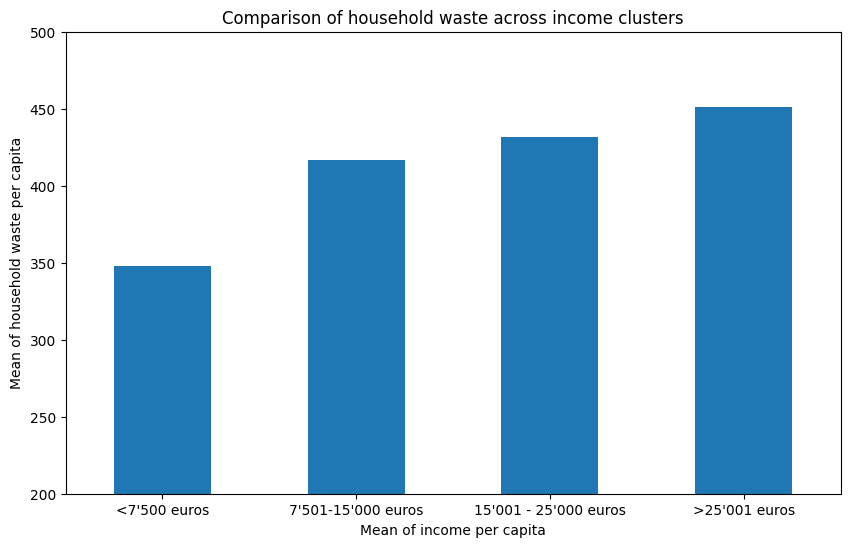

In [12]:

# ... (your existing code to define clusters and calculate means) ...

# Create bar chart for Waste with custom cluster names
cluster_means['Waste'].plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of household waste across income clusters')
plt.xlabel('Mean of income per capita')
plt.ylabel('Mean of household waste per capita')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Custom cluster names
cluster_names = ['<7\'500 euros', '7\'501-15\'000 euros', '15\'001 - 25\'000 euros', '>25\'001 euros']
plt.xticks(range(len(cluster_names)), cluster_names, rotation = 0, ha='center')  # Set custom x-axis labels

plt.ylim(200, 500)
plt.show()